# Paltas movie

Paltas software: https://github.com/swagnercarena/paltas


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
#%matplotlib inline
%matplotlib notebook

from lightcone.plot_3d import Plot3d
from lightcone.animate import Animate
from lenstronomy.Util import util


In [2]:
from lightcone.Util.image_util import import_galaxy

kwargs_source, source_light_model_list = import_galaxy(galaxy_name='ngc1300', size=1)



In [3]:
import paltas

from paltas.Configs.config_handler import ConfigHandler
import lightcone
root_path, _ = os.path.split(os.path.dirname(lightcone.__file__))
print(root_path)

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,'Data/Paltas/config_visualization.py'))

# First let's get the lenstronomy kwargs_model and kwargs_param
kwargs_model, kwargs_param = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print('')

#kwargs_model['multi_plane'] = True
#kwargs_model['z_source'] = kwargs_model['source_redshift_list'][0]
kwargs_model['source_light_model_list'] = source_light_model_list

print('lens_model_list')
print(kwargs_model['source_light_model_list'])

kwargs_lens = kwargs_param['kwargs_lens']

c:\users\zombi\lightcone


C:\Users\zombi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\paltas\Sampling\sampler.py:110: UserWarning: Parameter in cross dict specified elsewhere! Will be overwritten
  warnings.warn('Parameter in cross dict specified elsewhere!'


Available Keys:
dict_keys(['lens_model_list', 'lens_redshift_list', 'lens_light_model_list', 'point_source_model_list', 'source_light_model_list', 'source_redshift_list', 'multi_plane', 'z_source', 'z_source_convention'])

lens_model_list
['INTERPOL']


In [4]:


n_z_bins = 400

num_pix = 400
delta_pix = 0.01



# TODO coordinate grid from paltas
ra_grid, dec_grid, ra_at_xy_0, dec_at_xy_0, x_at_radec_0, y_at_radec_0, Mpix2coord, Mcoord2pix = util.make_grid_with_coordtransform(num_pix, delta_pix, center_ra=0, center_dec=0, left_lower=False,
                                   inverse=False)

kwargs_pixel_grid = {'nx': num_pix, 'ny': num_pix, 'ra_at_xy_0': ra_at_xy_0, 'dec_at_xy_0': dec_at_xy_0, 'transform_pix2angle': Mpix2coord}


plot3d = Plot3d(kwargs_model, kwargs_lens, kwargs_source, kwargs_pixel_grid, n_z_bins)

<IPython.core.display.Javascript object>


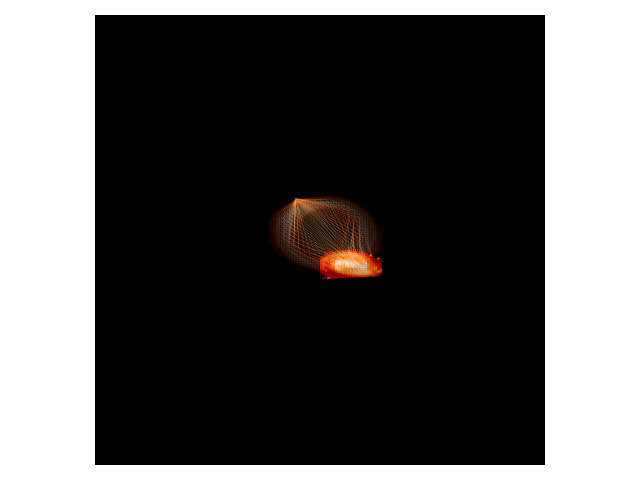

In [5]:


angle1 = 10 
angle2 = -100

fig = plt.figure()
plt.style.use('dark_background')
plot3d.plot3d(fig=fig, angle1=angle1, angle2=angle2, n_ray=0, plot_source=True, plot_lens=True, plot_rays=True, alpha_lens=0.05)
fig.tight_layout()
fig.show()


In [7]:
#folder_path = '/Users/sibirrer/Science/Projects/LensModelling/Educational/Movies/'
folder_path = r'C:\\Users\\zombi\\lightconeTests\\Movies\\'
movie_name = 'test_paltas'

kwargs_plot3d = {'kwargs_model': kwargs_model, 'kwargs_lens': kwargs_lens, 
                 'kwargs_source': kwargs_source, 'kwargs_pixel_grid': kwargs_pixel_grid, 
                 'n_z_bins': n_z_bins}


animate = Animate(movie_name=movie_name, folder_path=folder_path, **kwargs_plot3d)


angle1 = 10 
angle2 = -100

animate.ray_shooting(angle1, angle2)
animate.rotate_to_front(angle1, angle2, n_rotate=n_z_bins)
animate.mp4(fps=20)
animate.gif()
animate.finish()


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790


In [8]:
from IPython.display import Video

movie_file = animate.movie_name()
#folder_path + movie_name + ".mp4"

print(movie_file)

Video(movie_file, embed=True)

C:\\Users\\zombi\\lightconeTests\\Movies\\test_paltas.mp4
